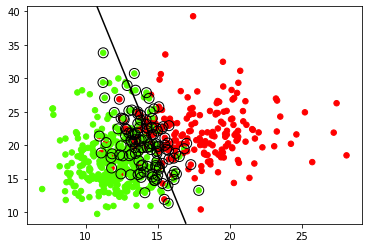

In [1]:
# All the libraries we need for linear SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# This is used for our dataset
from sklearn.datasets import load_breast_cancer


# =============================================================================
# We are using sklearn datasets to create the set of data points about breast cancer
# Data is the set data points
# target is the classification of those data points. 
# More information can be found athttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# =============================================================================
dataCancer = load_breast_cancer()

# The data[:, x:n] gets two features for the data given. 
# The : part gets all the rows in the matrix. And 0:2 gets the first 2 columns 
# If you want to get a different two features you can replace 0:2 with 1:3, 2:4,... 28:30, 
# there are 30 features in the set so it can only go up to 30.
# If we wanted to plot a 3 dimensional plot then the difference between x and n needs to be 3 instead of two
data = dataCancer.data[:, 0:2]
target = dataCancer.target

# =============================================================================
# Creates the linear svm model and fits it to our data points
# The optional parameter will be default other than these two,
# You can find the other parameters at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# =============================================================================
model = svm.SVC(kernel = 'linear', C = 10000)
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1], 50)
y = np.linspace(y_limit[0], y_limit[1], 50)
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the decision line for the data points, use model.predict if you are classifying more than two 
decision_line = model.decision_function(xy).reshape(Y.shape)


# Plot the decision line and the margins
axis.contour(X, Y,  decision_line, colors = 'k',  levels=[0], 
           linestyles=['-'])
# Shows the support vectors that determine the desision line
axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Shows the graph
plt.show()